In [1]:
import tensorflow as tf
from tensorflow.python.keras import models, layers
import matplotlib.pyplot as plt


2023-06-22 13:20:18.304615: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# 이미지 데터 tf dataset으로  불러오기, 이미지 데이터 세트를 사전처리한다. 
plant_img_path = './plant-data'
img_size = 256 # 이미지 크기 지정
batch_size = 32 # 표준 배치 크기
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    plant_img_path,
    shuffle=True, # 임의로 섞기
    image_size=(img_size, img_size),
    batch_size = batch_size 
)

class_names = dataset.class_names # 폴더 이름('Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy') -> 클래스 이름
print(class_names)
dataset_len = len(dataset)

Found 2152 files belonging to 3 classes.
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


2023-06-22 13:21:41.811520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2152]
	 [[{{node Placeholder/_0}}]]
2023-06-22 13:21:41.812312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2152]
	 [[{{node Placeholder/_4}}]]


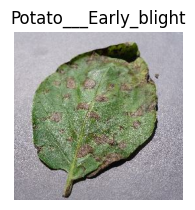

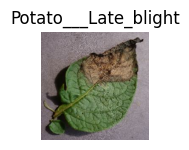

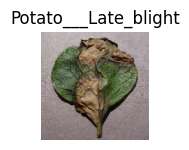

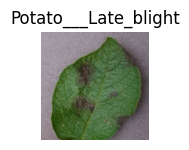

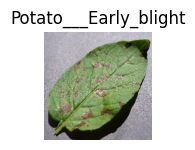

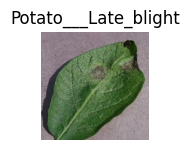

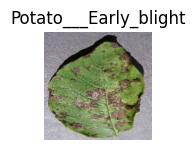

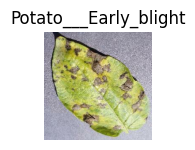

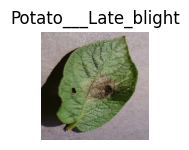

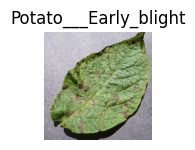

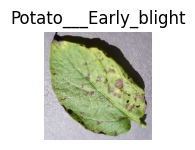

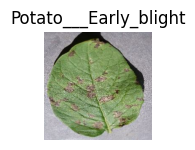

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
        plt.show()